In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract pillow opencv-python


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


Saving receipt-ocr-original.webp to receipt-ocr-original.webp


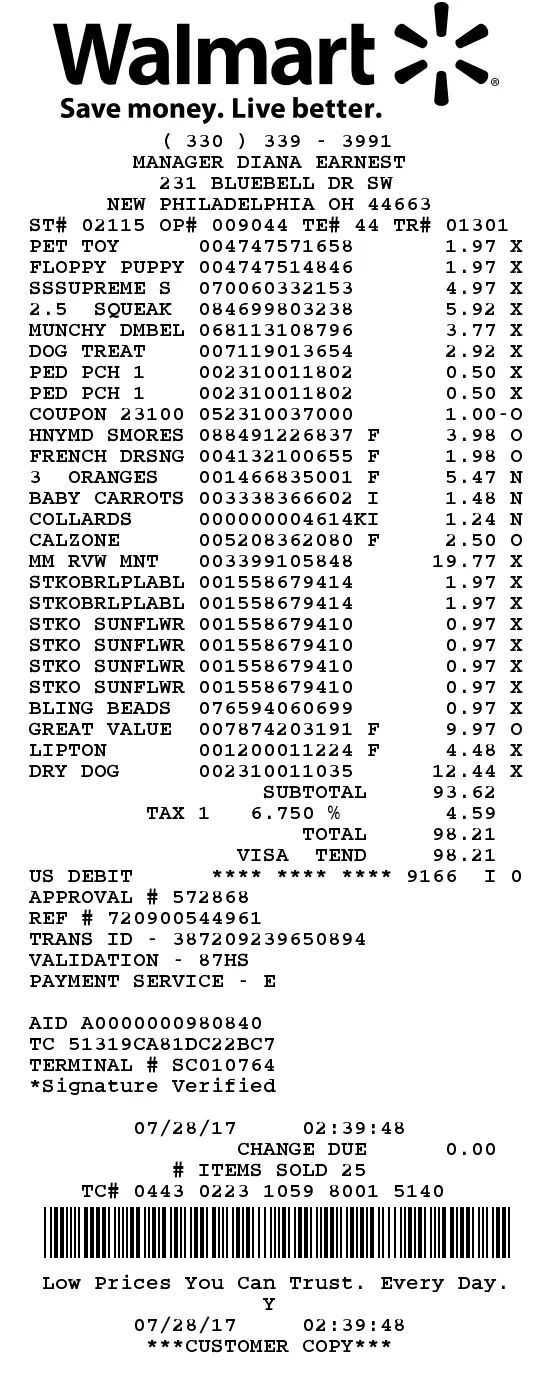

In [2]:
from google.colab import files
uploaded = files.upload()

import io
from PIL import Image

# Load the uploaded image
image_bytes = list(uploaded.values())[0]
img = Image.open(io.BytesIO(image_bytes))

img


(np.float64(-0.5), np.float64(553.5), np.float64(1372.5), np.float64(-0.5))

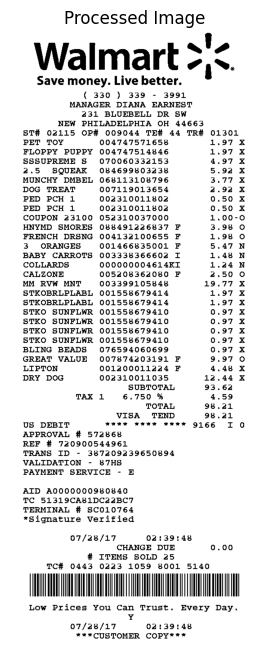

In [3]:
import cv2
import numpy as np

def preprocess(pil_img):
    # Convert PIL -> NumPy (OpenCV uses BGR)
    img = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    denoise = cv2.bilateralFilter(gray, 9, 75, 75)
    thresh = cv2.adaptiveThreshold(
        denoise, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 31, 2
    )

    return thresh

processed = preprocess(img)

# Show processed image
from matplotlib import pyplot as plt

plt.figure(figsize=(8,8))
plt.imshow(processed, cmap='gray')
plt.title("Processed Image")
plt.axis('off')


In [4]:
import pytesseract

# OCR using tesseract
text = pytesseract.image_to_string(Image.fromarray(processed), config="--oem 3 --psm 6")

print("📝 OCR OUTPUT:")
print("----------------------")
print(text)


📝 OCR OUTPUT:
----------------------
al,
aimafst 4,s.
Save money. Live better.
(330 ) 339 - 3991
MANAGER DIANA EARNEST
231 BLUEBELL DR SW
NEW PHILADELPHIA OH 44663
ST# 02115 OP# 009044 TE# 44 TR# 01301
PET TOY 004747571658 1.97 X
FLOPPY PUPPY 004747514846 1.97 X
SSSUPREME S 070060332153 4.97 X
2.5 SQUEAK 084699803238 5.92 X
MUNCHY DMBEL 068113108796 3.77 X
DOG TREAT 007119013654 2.92 X
PED PCH 1 002310011802 0.50 x
PED PCH 1 002310011802 0.50 x
COUPON 23100 052310037000 1,00-0
HNYMD SMORES 088491226837 F 3.98 0
FRENCH DRSNG 004132100655 F 1.98 0
3 ORANGES 001466835001 F 5.47 N
BABY CARROTS 003338366602 I 1.48 N
COLLARDS 000000004614KI 1.24 N
CALZONE 005208362080 F 2.50 0
MM RVW MNT 003399105848 19.77 X
STKOBRLPLABL 001558679414 1.97 X
STKOBRLPLABL 001558679414 1.97 X
STKO SUNFLWR 001558679410 0.97 x
STKO SUNFLWR 001558679410 0.97 x
STKO SUNFLWR 001558679410 0.97 x
STKO SUNFLWR 001558679410 0.97 x
BLING BEADS 076594060699 0.97 x
GREAT VALUE 007874203191 F 9.97 0
LIPTON 001200011224 F 4.

In [5]:
import re

def extract_date(text):
    patterns = [
        r"\d{1,2}[/-]\d{1,2}[/-]\d{2,4}",
        r"\d{4}[/-]\d{1,2}[/-]\d{1,2}",
        r"[A-Za-z]{3,9}\s+\d{1,2},\s*\d{4}"
    ]
    for p in patterns:
        match = re.search(p, text)
        if match:
            return match.group()
    return None

print("📆 Date:", extract_date(text))


📆 Date: 07/28/17


In [6]:
def extract_total(text):
    lines = text.lower().splitlines()
    for line in lines:
        if "total" in line or "amount" in line:
            nums = re.findall(r"\d+\.\d+|\d+", line)
            if nums:
                return nums[-1]
    return None

print("💰 Total Amount:", extract_total(text))


💰 Total Amount: 93.62
